In [1]:
'''
In this notebook, we generate features and come up with the models
'''

'\nIn this notebook, we generate features and come up with the models\n'

In [2]:
#for array manipulations
import numpy as np
#for image processing
import cv2 
#for displaying images
import matplotlib.pyplot as plt
#to display images in this notebook, not in a separate window
%matplotlib inline
#to access system resources such as directories
import os

In [3]:
import pandas as pd

In [4]:
os.getcwd()

'C:\\Users\\Admin\\Documents\\plant-diseases\\notebooks'

In [5]:
#set our base directory. This should point to the location of the plant-diseases folder
base_dir = 'C:\\Users\\Admin\\Documents\\plant-diseases'
data_folder = os.path.join(base_dir, 'data')
maize_data_folder = os.path.join(data_folder, 'maize')

In [6]:
#This function loads 32 images of a particular disease
def get_32(disease):
    '''
    disease:
        A string that could be common_rust, healthy, leaf_spot, nothern_leaf_blight
    ........
    disease_images:
        A list of images for the selected disease
    '''
    #this list will contain the 20 images returned
    disease_images = []
    #path to the images
    disease_images_path = os.path.join(maize_data_folder, disease)
    for image_path in os.listdir(disease_images_path):
        image_path = os.path.join(disease_images_path, image_path)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        disease_images.append(image)
    return disease_images

#This function will help us plot 10 images
def plot_images(images, title):
    '''
    images: List
        List of images
    title: String
        Title for each image i.e name of disease
    '''
    plt.figure(figsize=(15,6))
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.imshow(images[i])
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
#This function generates ORB features
def extract_features_orb(image, vector_size=32):
    try:
        feature_generator = cv2.ORB_create()
        orb_keypoints = feature_generator.detect(image)
        orb_keypoints = orb_keypoints[:32]
        orb_keypoints, orb_descriptors = feature_generator.compute(image, orb_keypoints)
        orb_descriptors = orb_descriptors.flatten()
        #The descriptor vector size is 128
        needed_size = (vector_size*128)
        if orb_descriptors.size < needed_size:
            #If we have less than 32 keypoints, add zeros to the end of our vector
            orb_descriptors = np.concatenate([orb_descriptors, np.zeros(needed_size - orb_descriptors.size)])
    except cv2.error as e:
        print(f'Error: {e}')
        return None
    return orb_descriptors

#This function generates KAZE features
def extract_features_kaze(image, vector_size=32):
    try:
        feature_generator = cv2.KAZE_create()
        kaze_keypoints = feature_generator.detect(image)
        kaze_keypoints = kaze_keypoints[:32]
        kaze_keypoints, kaze_descriptors = feature_generator.compute(image, kaze_keypoints)
        kaze_descriptors = kaze_descriptors.flatten()
        #The descriptor vector size is 128
        needed_size = (vector_size*128)
        if kaze_descriptors.size < needed_size:
            #If we have less than 32 keypoints, add zeros to the end of our vector
            kaze_descriptors = np.concatenate([kaze_descriptors, np.zeros(needed_size - kaze_descriptors.size)])
    except cv2.error as e:
        print(f'Error: {e}')
        return None
    return kaze_descriptors

def extract_features_hog(image, feature_size=4096):
    hog = cv2.HOGDescriptor()
    features = hog.compute(common_rust_images[0])
    required_features = features[:feature_size].ravel()
    return required_features

In [7]:
common_rust_images = get_32('common_rust')
healthy_images = get_32('healthy')
leaf_spot_images = get_32('leaf_spot')
nothern_leaf_blight_images = get_32('nothern_leaf_blight')

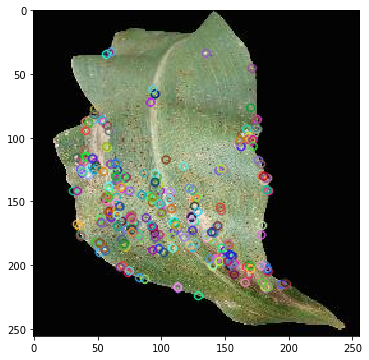

In [8]:
#Here we use ORB to generate features for a single image
orb = cv2.ORB_create()
kps, ds = orb.detectAndCompute(common_rust_images[0], None)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,6))
plt.imshow(with_keypoints)

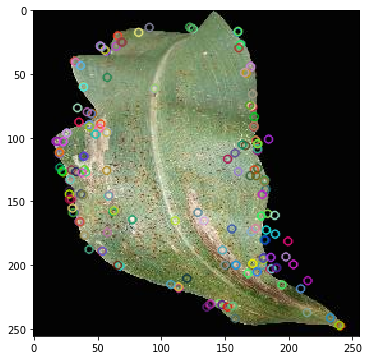

In [9]:
kaze = cv2.KAZE_create()
kps, ds = kaze.detectAndCompute(common_rust_images[0], None)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,6))
plt.imshow(with_keypoints)

In [11]:
def get_hog() : 
    winSize = (20,20)
    blockSize = (16,16)
    blockStride = (4,4)
    cellSize = (16,16)
    nbins = 9
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 0
    L2HysThreshold = 0.2
    gammaCorrection = 1
    nlevels = 64
    signedGradient = True

    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, signedGradient)

    return hog

In [12]:
hog = get_hog()
#image = cv2.resize(common_rust_images[0], (100,100))
features = hog.compute(image)
print(f'The HOG features calculated are {features.shape}')
required_features = features[:4096].ravel()
print(f'The features taken are {required_features.shape}')

The HOG features calculated are (8100, 1)
The features taken are (4096,)


In [ ]:
'''
kps, are keypoints. They contain the locations of those keypoints shown. This is a list of points, each point being
an x,y co-rodinate pair
'''
len(f'The number of keypoints is {len(kps)}')

In [ ]:
kps

In [ ]:
#A single keypoint
sample_keypoint = kps[0]
#The x,y co-rodinate
sample_keypoint.pt

In [ ]:
'''
Descriptors give us more information about the keypoints. The keypoints are used to generate the descriptiors
'''
ds.shape

In [ ]:
sample_ds = ds[0]
sample_ds

In [ ]:
common_rust_image_orb_features = extract_features_orb(common_rust_images[0])
common_rust_image_kaze_features = extract_features_kaze(common_rust_images[0])
common_rust_image_orb_features.shape, common_rust_image_kaze_features.shape

In [ ]:
healthy_image_orb_features = extract_features_orb(healthy_images[0])
healthy_image_kaze_features = extract_features_kaze(healthy_images[0])
healthy_image_orb_features.shape, healthy_image_kaze_features.shape

In [ ]:
leaf_spot_image_orb_features = extract_features_orb(leaf_spot_images[0])
leaf_spot_image_kaze_features = extract_features_kaze(leaf_spot_images[0])
leaf_spot_image_orb_features.shape, leaf_spot_image_kaze_features.shape

In [ ]:
nothern_leaf_blight_image_orb_features = extract_features_orb(nothern_leaf_blight_images[0])
nothern_leaf_blight_image_kaze_features = extract_features_kaze(nothern_leaf_blight_images[0])
nothern_leaf_blight_image_orb_features.shape, nothern_leaf_blight_image_kaze_features.shape

In [ ]:
#In this example, we generate a sample dataset, using the sample kaze features we just generated
#A dataset usually consists of an items features and the corresponding labels
#This will be our feature set
sample_kaze_features =[]
#This will contain our labels
sample_kaze_labels = []
sample_kaze_features.append(common_rust_image_kaze_features)
sample_kaze_labels.append('common_rust')
sample_kaze_features.append(healthy_image_kaze_features)
sample_kaze_labels.append('healthy')
sample_kaze_features.append(leaf_spot_image_kaze_features)
sample_kaze_labels.append('leaf_spot')
sample_kaze_features.append(nothern_leaf_blight_image_kaze_features)
sample_kaze_labels.append('nothern_leaf_blight')
sample_kaze_labels = np.array(sample_kaze_labels)
sample_kaze_features = np.array(sample_kaze_features)
#In our dataset, we have four instances and each instance has 4096 features
sample_kaze_features.shape

In [ ]:
#We have four labels, each label just tells us the disease type
sample_kaze_labels.shape

In [ ]:
#Here, we create a sample dataset for the model. X and y are the standard variables used
X = sample_kaze_features
y = sample_kaze_labels

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Scaling is one of the preprocessing steps to enable our models work better
X = StandardScaler().fit_transform(X)
#We split into a train set and a test set
X_train, X_test = train_test_split(X, test_size=0.1, random_state=4)

In [ ]:
print(f'Our train data set is of shape {X_train.shape}')
print(f'Our test dataset is of shape {X_test.shape}')

In [ ]:
from sklearn.preprocessing import LabelEncoder

#We encode our labels into numerical values since that is the kind of dataset that models work with
y = LabelEncoder().fit_transform(y)
#We then split into a train and test set
y_train, y_test = train_test_split(y, test_size=0.1, random_state=4)

In [ ]:
y_train.shape, y_test.shape

In [ ]:
y_train

In [ ]:
#Now let us perform these steps for all the 32 images loaded
#This will contain all our images
all_images = []
#This will contain all our labels
all_labels = []
labels = ['common_rust', 'healthy', 'leaf_spot', 'nothern_leaf_blight']
for i, image_folder in enumerate([common_rust_images, healthy_images, leaf_spot_images, nothern_leaf_blight_images]):
    for image in image_folder:
        all_images.append(image)
        all_labels.append(labels[i])

In [ ]:
len(all_images), len(all_labels)

In [ ]:
#Let us extraxt KAZE features
def extract_features():
    features, labels = [], []
    for i, image in enumerate(all_images):
        image_features = extract_features_kaze(image)
        image_label = all_labels[i]
        features.append(image_features)
        labels.append(image_label)
    features = np.array(features)
    labels = np.array(labels)
    features = StandardScaler().fit_transform(features)
    labels = LabelEncoder().fit_transform(labels)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = extract_features()

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
X_test[0]

In [ ]:
X_train[0]

In [ ]:
y_train[:10]

In [ ]:
y_test[:10]

In [ ]:
#Now these two, y_train and X_train can be fed into any classifier